In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterworkflow.data import get_url_data
import pandas as pd
from sklearn import preprocessing 

import numpy as np

# Load data

In [2]:
%%time
data = get_url_data()

...loading csv
CPU times: user 23.2 s, sys: 1.7 s, total: 24.9 s
Wall time: 26.7 s


In [3]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-14 18:00:00,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
2010-01-25 23:00:00,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2013-03-19 20:30:00,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
2010-11-11 18:00:00,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
2014-01-11 23:00:00,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [7]:
# generate counts for timestamps 
data_time = data['Time Occurred'].groupby('Date').agg([ 'count'])
data_time.head()

,count
Date,
2010-01-01 10:00:00,3
2010-01-01 10:30:00,1
2010-01-01 10:50:00,1
2010-01-01 11:00:00,3
2010-01-01 11:15:00,1


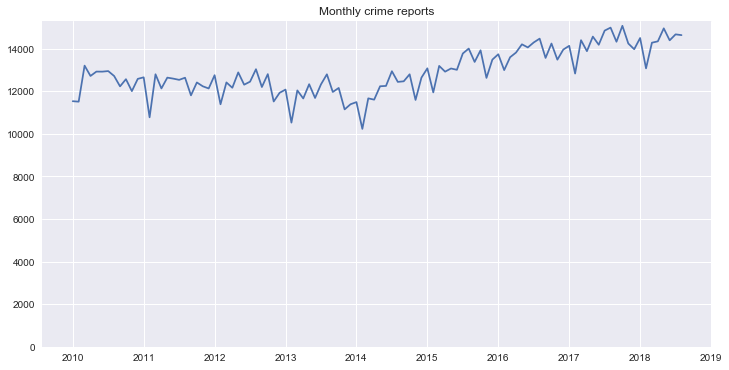

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
title = 'Monthly crime reports'
data_time[data_time.index<='2018-09-01'].resample('M').sum().plot(ax=ax, legend=None, title = title );
plt.ylim(0,None)
plt.xlabel('');

In [ ]:
# Number of companies complained about
companies = data['Company'].value_counts()
print('Number of Companies compained about: {}'.format(len(companies)))

In [ ]:
# Top 20 complained against companies
top_20 = data['Company'].value_counts()[0:20]
top_20[::-1].plot(kind='barh');

## plot data

https://www.consumer.ftc.gov/blog/2017/09/equifax-data-breach-what-do

In [ ]:
data['Company'].groupby([data.index]).agg([ 'count']).resample('W').sum().plot();

In [ ]:
data.groupby(['Date received', 'State'])['Company'].agg([ 'count']).pivot_table('count', index = 'Date received', columns='State', fill_value=0).sum().sort_values(ascending=False)

In [ ]:
data.groupby(['Date received', 'State'])['Company'].agg(['count']).pivot_table(
    'count', index='Date received', columns='State', fill_value=0).resample('M').sum().plot(y=['CA', 'FL','TX','NY','IL'], legend=False);

In [ ]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

In [ ]:
data.groupby(data.index.time).mean().plot();

In [ ]:
# This can also be done as day of week in index and different weeks for columns

# this is hour in the index and days in the columns, gives the traffic flow for each hour of the day 
pivoted_table = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted_table.head()

In [ ]:
pivoted_table.plot(legend = False, alpha = 0.01)

 # Refactored code

In [ ]:
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [ ]:
pivoted.plot(legend=False, alpha = 0.1);

In [ ]:
pivoted.T.shape
# this yields 2097 observations for hour of the day 

In [ ]:
from sklearn.decomposition import PCA
PCA(2)

In [ ]:
X = pivoted.fillna(0).T.values

In [ ]:
X.shape

In [ ]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1]);

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap='rainbow');
plt.colorbar()

In [ ]:
len(labels)

In [ ]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==0].T.plot(legend=False, alpha = 0.1);

In [ ]:
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

In [ ]:
# want to see what day of week these graphs represnent 
pivoted.columns

In [ ]:
pd.DatetimeIndex(pivoted.columns).dayofweek

In [ ]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [ ]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dates.dayofweek<5)]

# Look at blog post on this analysis as well

# Can look at days with smallest granularity and week as columns in dataframe. 

# Full PCA analysis, solving for multiples axes, up to 7 for 7 days of the week 

can solve for the smallest number between observations or variables 

In [ ]:
# create PCA object
pca= PCA()

In [ ]:
# need to center and scale the data 
# the data also needs to be transposed. The columns or varibales become the rows for PCA loading scores
# only scale data if it's not on the same scale 
# https://stats.stackexchange.com/questions/105592/not-normalizing-data-before-pca-gives-better-explained-variance-ratio#105649
scaled_data = X

In [ ]:
# calculate loading scores and variation each principle compenent acount for 
pca.fit(scaled_data)

In [ ]:
# generate coordinates based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [ ]:
# scree plot
# generate percentage that each PCA accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# generate labels for scree plot
labels = ['PC' + str(num) for num in range(1, len(per_var) + 1)]

In [ ]:
plt.bar(left=range(1, len(per_var) + 1), height = per_var, tick_label=labels)
plt.show()

In [ ]:
X.shape

In [ ]:
# generate df with pca coordinates, variables are presented as rows, thus the index should be variable names, the columns represent the different PCA axis 
pca_df = pd.DataFrame(pca_data, index = pivoted.T.index.values,columns=labels)

In [ ]:
pca_df.head()

In [ ]:
# plot pc1 versus pc2
pca_df.plot(kind='scatter', x='PC1', y='PC2')
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

# plot labels
#for sample in pca_df.index:
 #   plt.annotate(sample, (pca_df['PC1'][sample]+.2,  pca_df['PC2'][sample]))

In [ ]:
# let's look at the loading score for PC1 to see which ones had the largest influence on separating the two clusters along the x axis
# series object from loading scores in PC1
# top 10 by absolute value, capturing index 
loading_scores = pd.DataFrame(pca.components_[0], index = pivoted.index.values)
sorted_loading_scores = loading_scores.abs().sort_values( by = [0],ascending=False)
top_ten_genes = sorted_loading_scores[0:10].index
loading_scores[loading_scores.index.isin(top_ten_genes)].sort_values(by=0,ascending=False)

In [ ]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

In [ ]:
plt.scatter(pca_df['PC1'],pca_df['PC2'], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)
labels

In [ ]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

In [ ]:
# Isolates weekdays
pd.Series(pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')).value_counts().plot(kind='bar');

In [ ]:
# Sundays that behave like weekdays
Sun_index  = pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')=='Sun'
pd.DatetimeIndex(pivoted.T[labels==0].index)[Sun_index]

In [ ]:
# isolate weekends
pd.Series(pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')).value_counts().plot(kind='bar');

In [ ]:
# Solve for Tue
Tue_index  = pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')=='Tue'

In [ ]:
# All Tuesdays that behave like Weekends 
pd.DatetimeIndex(pivoted.T[labels==1].index)[Tue_index]

# If days behave differently then subtract them break them out into separate analysis for predicting. 